<a href="https://colab.research.google.com/github/poonamaswani/DataScienceAndAI/blob/main/CAM_DS_C101_Demo_6_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>

**First things first** - please go to 'File' and select 'Save a copy in Drive' so that you have your own version of this activity set up and ready to use.
Remember to update the portfolio index link to your own work once completed!

# Demonstration 6.1.3 Applying k-means logic

Watch the following demonstration to see how k-means clustering is implemented in Python. In this video, you’ll learn:
- how to perform k-means clustering from scratch and through the use of the scikit-learn library
- how outliers impact k-means clustering
- how scaling impacts k-means clustering.


## a. Implementing k-means from scratch

In [ ]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Set random seed.
np.random.seed(42)

# Create the data set.
N = 100
height_S = np.random.uniform(150, 166, N)
weight_S = np.random.uniform(50, 72, N)
size_S = ['S'] * N

height_M = np.random.uniform(166, 180, N)
weight_M = np.random.uniform(60, 84, N)
size_M = ['M'] * N

height_L = np.random.uniform(180, 195, N)
weight_L = np.random.uniform(70, 104, N)
size_L = ['L'] * N

In [ ]:
# Create a DataFrame.
# Combine the data.
height = np.concatenate([height_S, height_M, height_L])
weight = np.concatenate([weight_S, weight_M, weight_L])
size = np.concatenate([size_S, size_M, size_L])

# Create a new DataFrame.
data = pd.DataFrame({'height': height,
                     'weight': weight,
                     'size': size})

# View the output.
data.head()

,height,weight,size
0,155.992642,50.691442,S
1,165.211429,64.001029,S
2,161.711903,56.915832,S
3,159.578536,61.188555,S
4,152.496298,69.966462,S


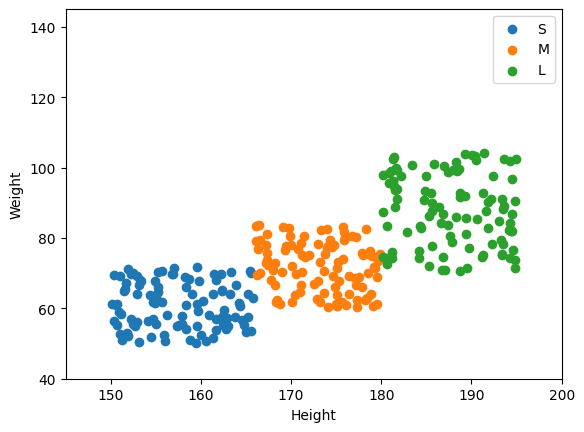

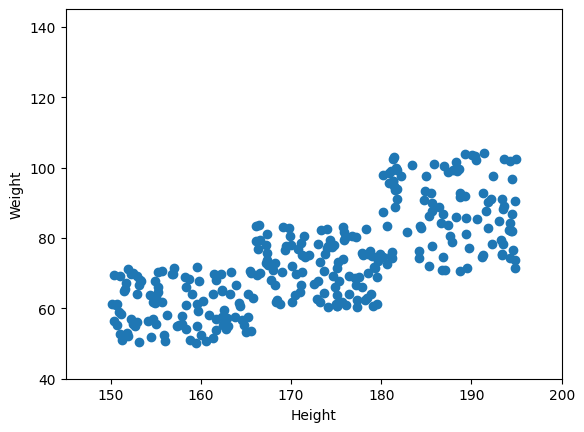

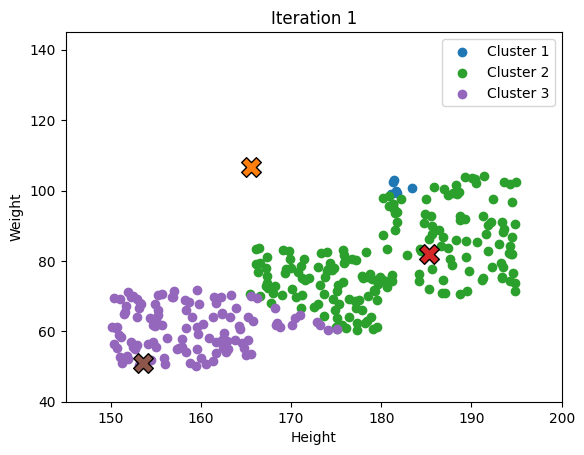

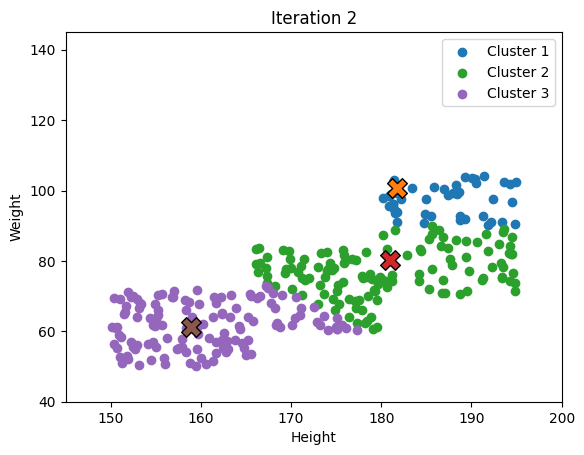

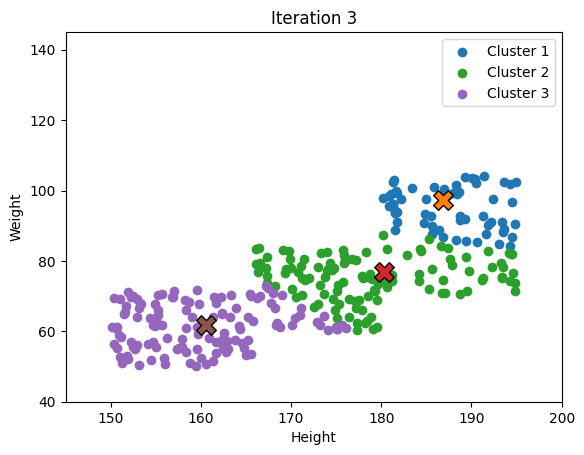

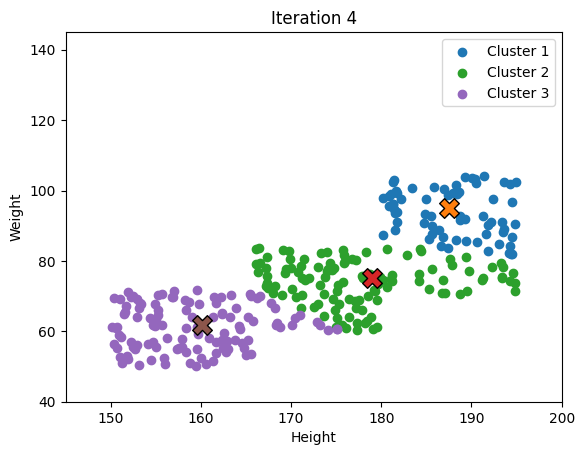

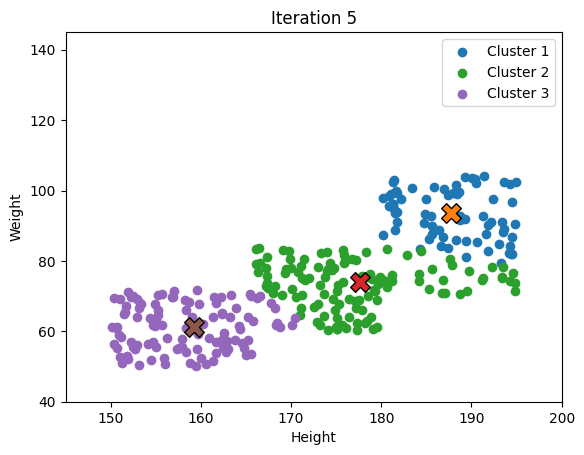

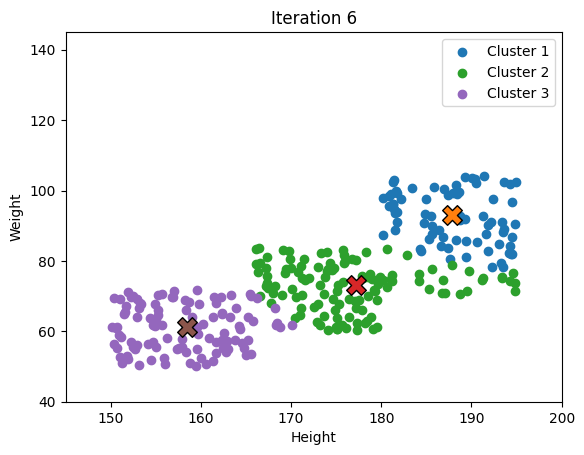

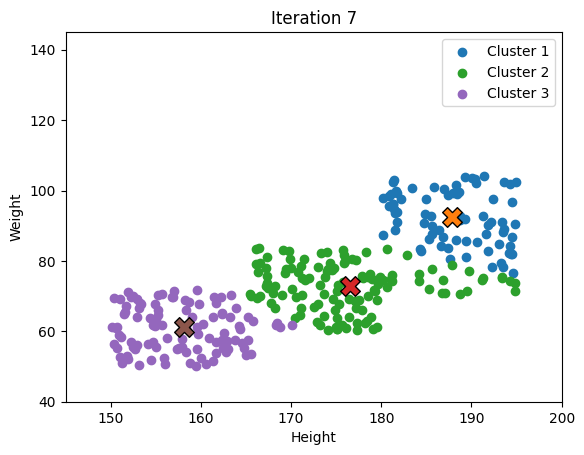

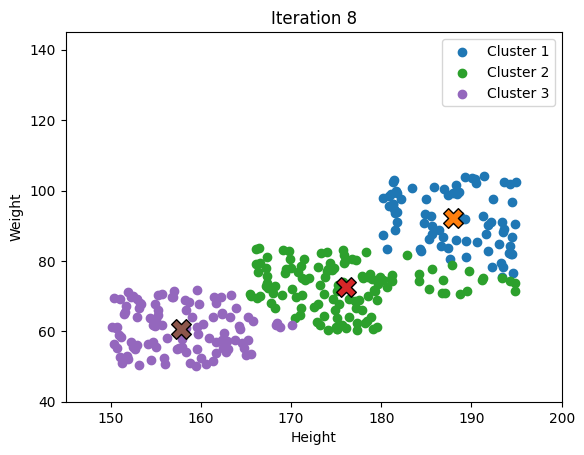

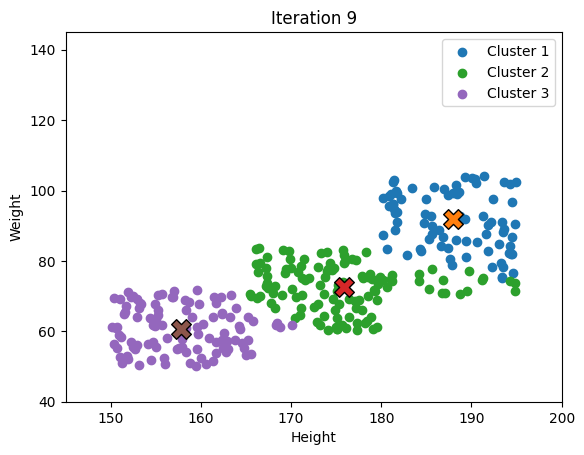

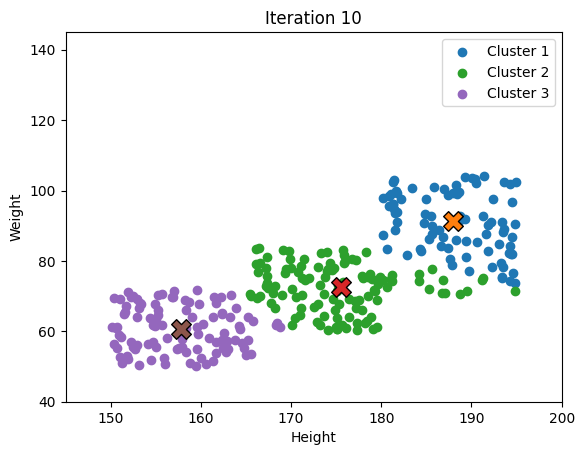

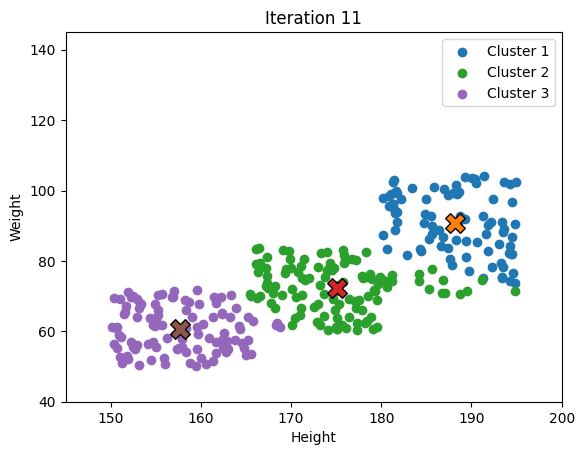

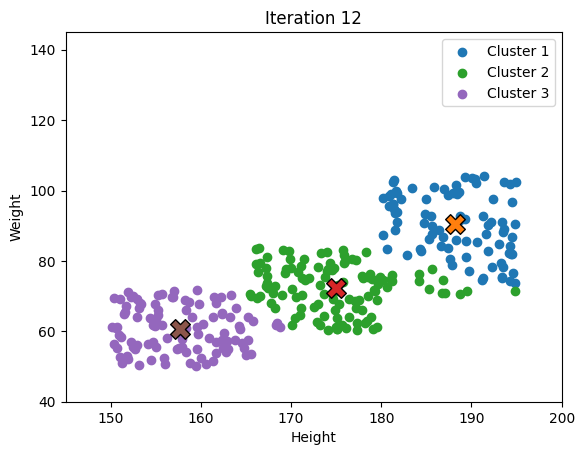

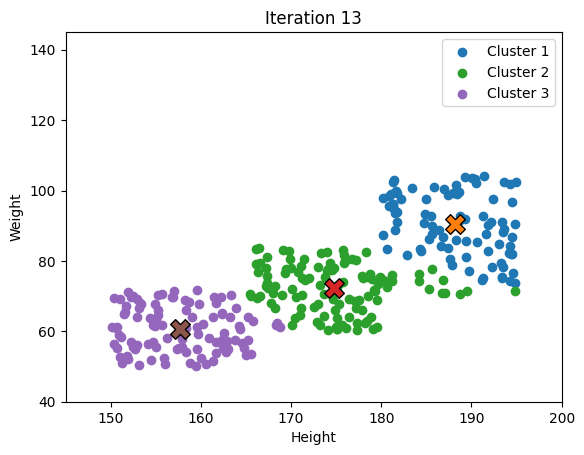

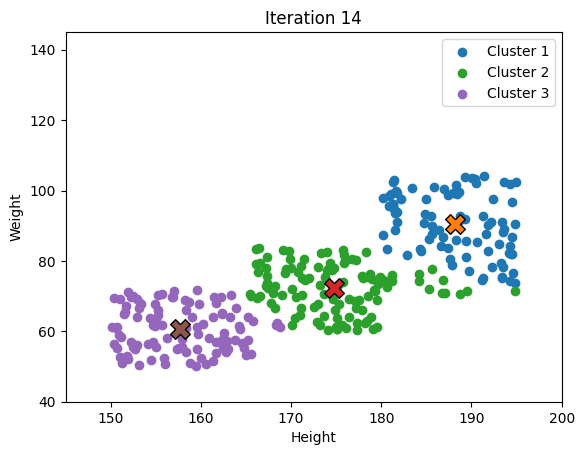

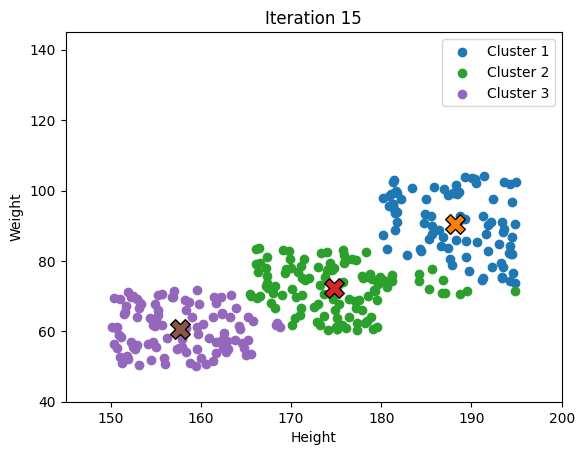

[[188.19832808  90.3924625 ]
 [174.80026603  72.25436322]
 [157.69219379  60.78861051]]


In [ ]:
# Create scatterplots to view clusters.
for cluster_name in data["size"].unique():
    cluster_data = data[data['size'] == cluster_name]
    plt.scatter(cluster_data['height'],
                cluster_data['weight'],
                label=cluster_name)


plt.xlabel('Height')
plt.ylabel('Weight')
plt.xlim(145,  200)
plt.ylim(40, 145)
plt.legend()
plt.show()


color_map = {'S': 'blue',
             'M': 'yellow',
             'L': 'red'}
colors = data['size'].map(color_map)

plt.scatter(data['height'], data['weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.xlim(145, 200)
plt.ylim(40, 145)
plt.show()

def euclidean(x, y):
    return (np.sqrt(np.sum(np.square(x - y))))


def k_means_from_scratch(data, k=2, max_iters=10):
    # Randomly initialize centroids
    # For reproducibility.
    np.random.seed(42)
    centroids = np.random.uniform(low=[145, 40],
                                  high=[200, 110],
                                  size=(k, 2))

    for iteration in range(max_iters):
        # Assign clusters based on the nearest centroid
        clusters = []
        for _, row in data.iterrows():
            distances = [(euclidean(row[['height', 'weight']],
                                    centroid)**2) for centroid in centroids]
            cluster = np.argmin(distances)
            clusters.append(cluster)

        data['cluster'] = clusters

        # Plot the data and centroids.
        for cluster_idx in range(k):
            cluster_data = data[data['cluster'] == cluster_idx]
            plt.scatter(cluster_data['height'],
                        cluster_data['weight'],
                        label=f'Cluster {cluster_idx + 1}')
            plt.scatter(*centroids[cluster_idx],
                        s=200, marker='X',
                        edgecolor='black')

        plt.xlabel('Height')
        plt.ylabel('Weight')
        plt.xlim(145, 200)
        plt.ylim(40, 145)
        plt.title(f'Iteration {iteration + 1}')
        plt.legend()
        plt.show()

        # Update centroids.
        for cluster_idx in range(k):
            centroids[cluster_idx] = data[data['cluster'] == cluster_idx][['height', 'weight']].mean().values

    return centroids, data

# Running our custom k-means algorithm.
final_centroids, data = k_means_from_scratch(data, k=3, max_iters= 15)
print(final_centroids)

## b. K-means with scikit-learn

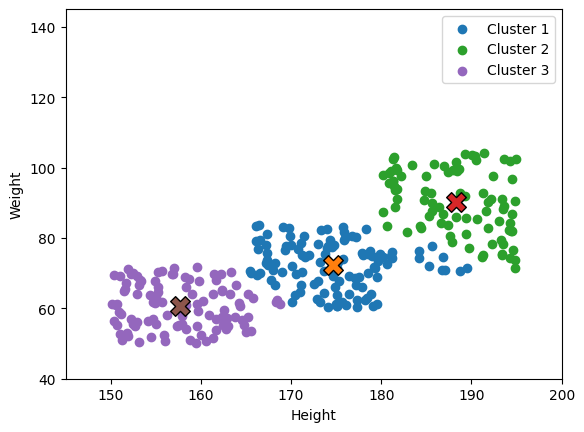

Final Centroids: [[174.62333775  72.26201658]
 [188.27501219  90.17149821]
 [157.69219379  60.78861051]]


In [ ]:
# Use the same data set.

# Perform k-means clustering using scikit-learn.
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42,  n_init=10)
data['cluster'] = kmeans.fit_predict(data[['height', 'weight']])

# Extracting centroids.
centroids = kmeans.cluster_centers_

# Plotting the clusters and centroids.
for cluster_idx in range(3):
    cluster_data = data[data['cluster'] == cluster_idx]
    plt.scatter(cluster_data['height'],
                cluster_data['weight'],
                label=f'Cluster {cluster_idx + 1}')
    plt.scatter(*centroids[cluster_idx],
                s=200, marker='X',
                edgecolor='black')

plt.xlabel('Height')
plt.ylabel('Weight')
plt.xlim(145, 200)
plt.ylim(40, 145)
plt.legend()
plt.show()

# Print final centroids.
print("Final Centroids:", centroids)

## c. K-means with outliers

In [ ]:
# Import necessary library.
from sklearn.cluster import KMeans

# Create a new data set with outliers.
# Existing data generation.
N = 100
height_S = np.random.uniform(150, 166, N)
weight_S = np.random.uniform(50, 72, N)
height_M = np.random.uniform(166, 180, N)
weight_M = np.random.uniform(60, 84, N)
height_L = np.random.uniform(180, 195, N)
weight_L = np.random.uniform(70, 104, N)


# Generate outliers.
N_outliers = 10
# Extreme values.
height_outliers = np.random.uniform(180, 200, N_outliers)
# Extreme values.
weight_outliers = np.random.uniform(40, 145, N_outliers)

# Combine data.
height = np.concatenate([height_S, height_M,
                         height_L, height_outliers])
weight = np.concatenate([weight_S, weight_M,
                         weight_L, weight_outliers])

# Create DataFrame.
data_2 = pd.DataFrame({'height': height,
                       'weight': weight})

# View output.
data_2.head()

,height,weight
0,150.929338,59.028424
1,163.858818,66.622125
2,159.617840,55.033560
3,161.329161,51.693558
4,150.329352,56.374532


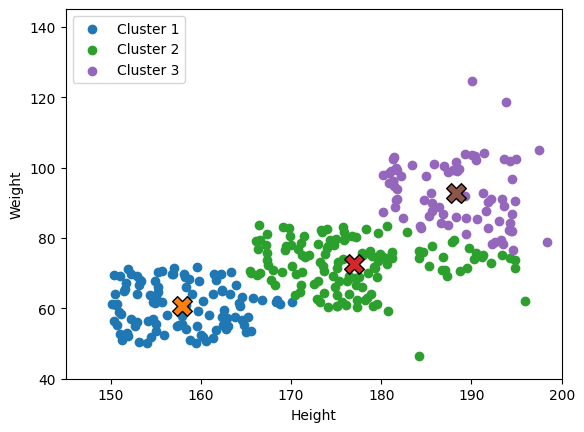

Final Centroids: [[157.85068623  60.76102068]
 [176.96156054  72.49688778]
 [188.23416787  92.75737058]]


In [ ]:
# Perform K-means clustering.
kmeans = KMeans(n_clusters=3,
                random_state=42,
                n_init=10)
data_2['cluster'] = kmeans.fit_predict(data_2[['height', 'weight']])

# Extract centroids.
centroids = kmeans.cluster_centers_

# Plotting the clusters and centroids.
for cluster_idx in range(3):
    cluster_data = data_2[data_2['cluster'] == cluster_idx]
    plt.scatter(cluster_data['height'],
                cluster_data['weight'],
                label=f'Cluster {cluster_idx + 1}')
    plt.scatter(*centroids[cluster_idx],
                s=200, marker='X',
                edgecolor='black')

plt.xlabel('Height')
plt.ylabel('Weight')
plt.xlim(145, 200)
plt.ylim(40, 145)
plt.legend()
plt.show()

# Print final centroids.
print("Final Centroids:", centroids)

## d. K-means before and after feature scaling

In [ ]:
# Import necessary library.
from sklearn.preprocessing import StandardScaler

# Create a data set.
N = 100
np.random.seed(42)

age_young = np.random.uniform(18, 35, N)
age_old = np.random.uniform(36, 65, N)

income_low = np.random.uniform(20000, 50000, N)
income_high = np.random.uniform(50001, 150000, N)

spending_low = np.random.uniform(1, 50, N)
spending_high = np.random.uniform(51, 100, N)

age = np.concatenate([age_young, age_old])
income = np.concatenate([income_low, income_high])
spending = np.concatenate([spending_low, spending_high])

# Save data as DataFrame.
data_3 = pd.DataFrame({'age': age,
                       'income': income,
                       'spending_score': spending})

# View output.
data_3.head()

,age,income,spending_score
0,24.367182,39260.949385,6.053070
1,34.162143,22524.198950,45.225092
2,30.443897,24848.861423,25.757366
3,28.177194,46956.625656,41.496416
4,20.652317,38192.871790,16.682430


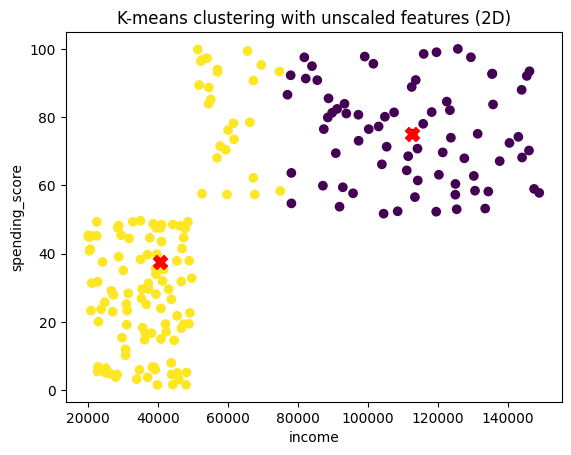

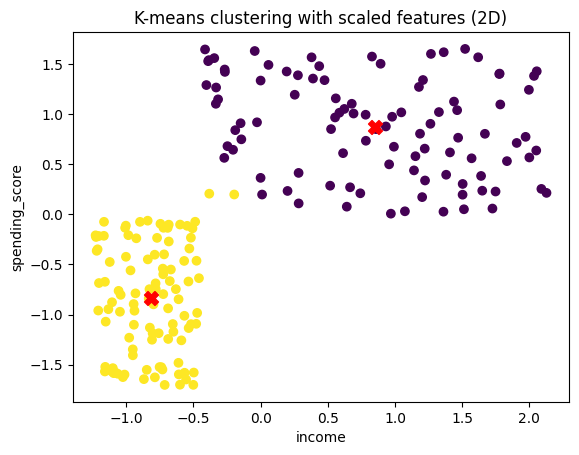

In [ ]:
# Function to perform k-means clustering and plot the clusters in 2D.
def plot_k_means(data, features, scaled=False):
    # Extract the selected features
    X = data_3[features].values

    # Optionally scale the features.
    if scaled:
        scaler = StandardScaler()
        X = scaler.fit_transform(X)

    # Perform k-means clustering.
    kmeans = KMeans(n_clusters=2, random_state=42,  n_init=10)
    kmeans.fit(X)
    labels = kmeans.labels_

    # 2D scatter plot.
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')

    # Plotting centroids.
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0],
                centroids[:, 1],
                s=100, c='red',
                marker='X')

    # Labeling axes.
    plt.xlabel(features[0])
    plt.ylabel(features[1])

    # Title.
    if scaled:
        plt.title('K-means clustering with scaled features (2D)')
    else:
        plt.title('K-means clustering with unscaled features (2D)')

    # Show plot.
    plt.show()

# Choose two features for 2D plotting.
selected_features = ['income', 'spending_score']

# Plot unscaled data.
plot_k_means(data_3, selected_features, scaled=False)

# Plot scaled data.
plot_k_means(data_3, selected_features, scaled=True)


# Key information
This demonstration illustrated the difference between employing k-means clustering from scratch and with the scikit-learn library.

## Reflect
What are the pracitical applications of this technique?

> Select the pen from the toolbar to add your entry.